# Part 1: Supervised Learning

## Introduction

Supervised Learning is the simplest type of machine learning where algorithms learn from labeled training data and map features to known output variables. The goal of these algorithms is to model a dataset to generalize well on unseen data. Both classification and regression tasks can be performed by supervised models. Six of the most common supervised learning models include linear regression, logistic regression, support vector machines, k-nearest-neighbors, decision trees, and random forests. 

## Linear Regression

Linear regressions use the equation of a straight line to model the relationship between input and output variables to solve regression problems for quantitative datasets. The algorithm identifies coefficients for the line equation by minimizing the mean squared error. This simple, easily interpretable model works well for linear relationships. However, it is sensitive to outliers and assumes linearity, narrowing the range of potential use cases. Scenarios where a linear model may be a strong choice is for predicting sales and measuring stock market trends.

### Case Study

RMSE: 4.93
R²: 0.67


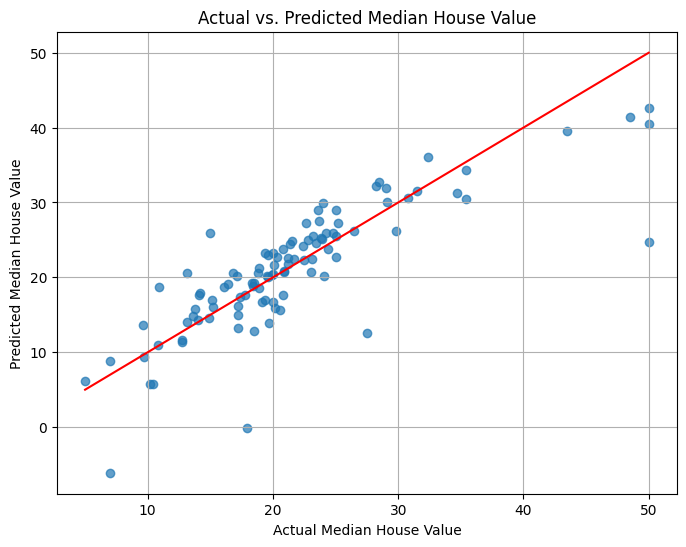

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Load data
data_path = "C:/Users/scgoo/OneDrive/Documents/colleges/Jacksonville/Spring 2025/Math 470 - ML Algorithms/githubMath470/Final Project/data/"
dataset = pd.read_csv(data_path + "boston.csv")
X = dataset.drop(columns=["MEDV"])
y = dataset["MEDV"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate with MSE and R2
predictions = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# Plotting the predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-')  # Ideal line
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs. Predicted Median House Value")
plt.grid(True)
plt.show()

### Report

The [Boston Housing](https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data) data used for this model is from kaggle. This linear model preidicts the median value of boston houses based on demographic factors. It is evaluated using root mean squared error (RMSE) and r2 values. RMSE measures the average difference between actual and predicted values. A RMSE of 4.93 indicates that on average, these model predictions are off by $4930, given that the median value is measured in thousands. R2 values indicate how much the target variable can be explained by the features, providing an indication of model accuracy. A r2 value of 0.67 indicates that the model is about 67% accurate. The skatter plot with regression line shows the relationship between actual versus predicted values. 

## Logistic Regression

Logistic regressions work with quantitative and qualitative data to perform classification tasks by using the logistic function to model the probability of a binary result. This is computationally efficient and works well when classes are linearly separable. These models struggle with data that is not as easily separable due to their sensitivity of correlated features. This model is ideal for scenarios such as disease prediction and spam classification.

### Case Study

In [2]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load data
dataset = pd.read_csv(data_path + "diabetes.csv")
X = dataset.drop(columns = ["Outcome"])
y = dataset["Outcome"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



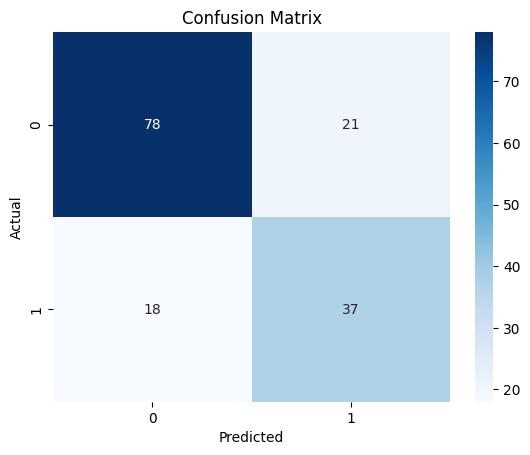

In [3]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') 
recall = recall_score(y_test, y_pred, average='weighted')   
f1 = f1_score(y_test, y_pred, average='weighted')       

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.75
Precision: 0.75
Recall: 0.75
F1 Score: 0.75


### Report

The [Diabetes Dataset](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) data used for this model is from kaggle. This logistic regression predicts whether a patient has diabetes based on physiological characteristics. Evaluation metrics of 0.75 indicate promising predictive power with balanced classes. Parameter optimization could further improve these outcomes.

## Suport Vector Machines (SVM)

Support Vector Machines (SVM) works for both classification and regression problems by directly using quantitative data, though qualitative data can be applied with transformations. This model identifies the optimal hyperplane to maximize the margin between classes, using kernel functions to model non-linear relationships. SVM is effective for high-dimensional data and resistant to overfitting with tuning. However, it is computationally expensive for large datasets and requires tuning of kernel parameters. Scenarios where SVM is ideal include image classification and stock price prediction. 

### Case Study

In [5]:
# Import SVM
from sklearn.svm import SVC

# Load data
dataset = pd.read_csv(data_path + "data.csv")

# Clean data
dataset.fillna(0, inplace=True)
X = dataset.drop(columns = ["diagnosis"])
y = dataset["diagnosis"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Print performance
print("SVM Performance:")
print(classification_report(y_test, y_pred_svm))

SVM Performance:
              precision    recall  f1-score   support

           B       0.62      1.00      0.77        71
           M       0.00      0.00      0.00        43

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114



C:\Users\scgoo\anaconda3\envs\ml-env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\scgoo\anaconda3\envs\ml-env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\scgoo\anaconda3\envs\ml-env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


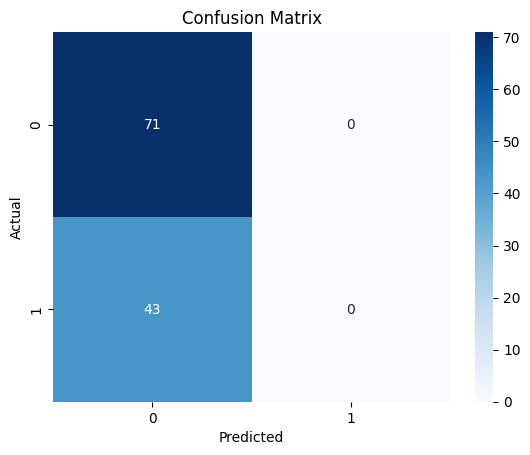

In [6]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [7]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, average='weighted')  
recall = recall_score(y_test, y_pred_svm, average='weighted')    
f1 = f1_score(y_test, y_pred_svm, average='weighted')        

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.62
Precision: 0.39
Recall: 0.62
F1 Score: 0.48


C:\Users\scgoo\anaconda3\envs\ml-env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Report

The [Breast Cancer](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data) data used for this model is from kaggle. This SVM model predicts the diagnosis type based on various measurement characteristics. An accuracy of 62% indicates potential predictive power, lying better than a random guess. Precision and recall of 39% and 62% respectively indicate more false positives than false negatives. Depending on the nature of implementation, this could be problematic. The f1 score of 48% highlights this imbalance. Parameter optimization could improve accuracy, as well as the PR balance. 

## K-Nearest Neighbors (KNN)

K-Nearest Neighbors (kNN) can perform both classification and regression tasks. Quantitative data is ideal for these models, but it is possible for them to handle categorical data as well. KNN models classify data points by measuring the Euclidean distance for k number of nearest neighbors. In regression settings, the averages of the k-nearest neighbors are used to determine the class. This model type is simple and intuitive, while being able to model complex decision boundaries. However, this leads to computationally expensive inference time, sensitivity to feature selection, and the decision of the k value to be highly impactful. For classification, kNN is ideal for recommendation systems. For regression, it is ideal for predicting house prices based on similar houses. 

### Case Study

In [20]:
# Import kNN 
from sklearn.neighbors import KNeighborsClassifier

# Load data
dataset = pd.read_csv(data_path + "Iris.csv")
X = dataset.drop(columns = ["Species"])
y = dataset["Species"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [10]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  
recall = recall_score(y_test, y_pred, average='weighted')    
f1 = f1_score(y_test, y_pred, average='weighted')        

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


### Report

The [Iris](https://www.kaggle.com/datasets/uciml/iris) data used for this model is from kaggle. This KNN model predicts the iris species based on flower characteristics. Evaluation metrics of 1.00 indicate overfitting. A larger dataset or changing k could reduce overfitting risk. 

## Decision Tree

Decision Trees work with both quantitative and qualitative data on classification and regression tasks to split data into subsets based on features. For classification, either gini impurity or entropy is used, while regression uses mean squared error. These models are easily interpretable, don’t require scaling or normalization, and handle missing data well. However, they are prone to overfitting and sensitive to small changes in data. Scenarios where decision trees work well is medical diagnosis and predicting house prices based on many factors. 

### Case Study

In [11]:
# Import decision tree
from sklearn.tree import DecisionTreeClassifier

# Load data
dataset = pd.read_csv(data_path + "german_credit_data.csv")
X = dataset.drop(columns = ["Purpose"])
y = dataset["Purpose"]

# Convert categorical columns to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print report
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

           business       0.13      0.11      0.12        18
                car       0.34      0.35      0.35        63
domestic appliances       0.00      0.00      0.00         1
          education       0.15      0.13      0.14        15
furniture/equipment       0.31      0.27      0.29        44
           radio/TV       0.26      0.30      0.28        54
            repairs       0.00      0.00      0.00         3
    vacation/others       0.00      0.00      0.00         2

           accuracy                           0.27       200
          macro avg       0.15      0.15      0.15       200
       weighted avg       0.27      0.27      0.27       200



In [13]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  
recall = recall_score(y_test, y_pred, average='weighted')    
f1 = f1_score(y_test, y_pred, average='weighted')      

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.27
Precision: 0.27
Recall: 0.27
F1 Score: 0.27


### Report

The [Credit Risk](https://www.kaggle.com/datasets/uciml/german-credit) data used for this model is from kaggle. This decision tree model predicts purpose of credit transaction based on personal characteristics and financial records. Evaluation metrics of 27% indicate week model performance. Selecting a difference prediction category or parameter optimization could improve prediction possibilities. 

## Random Forest

Random Forest models are an extension on decision trees that work for both classification and regression with quantitative and qualitative data. This mode uses multiple decision trees trained on random subsets of data and features via bagging to aggregate predictions. This results in a majority dictating classification predictions and averages defining regression predictions. The use of multiple trees minimizes overfitting risk compared to one tree. This works well for large datasets and can handle missing data well. However, this is more computationally expensive than decision trees and harder to interpret. These models are ideal for fraud detection and customer churn prediction.

### Case Study

In [14]:
# Imoprt random forest
from sklearn.ensemble import RandomForestClassifier

# Load data
dataset = pd.read_csv(data_path + "heart.csv")
X = dataset.drop(columns = ["target"])
y = dataset["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



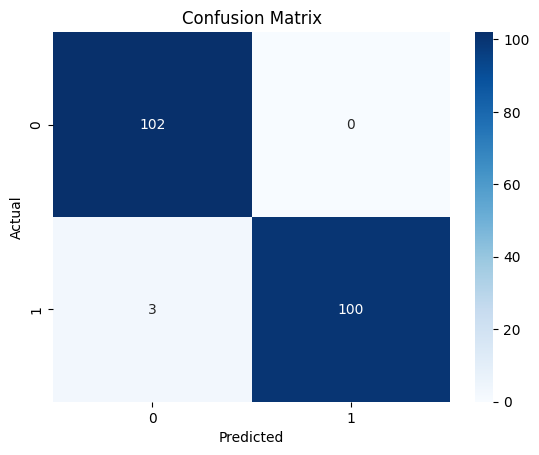

In [15]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [16]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  
recall = recall_score(y_test, y_pred, average='weighted')    
f1 = f1_score(y_test, y_pred, average='weighted')      

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99


### Report

The [Heart Disease](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset) data used for this model is from kaggle. This random forest model predicts whether someone has heart disease based on physiological characteristics.Evaluation metrics of 99% indicate overfitting. A larger dataset size or larameter optimization may improve predictive power and reduce overfitting. 

## Summary

Each of these six algorithms has their own unique strengths, weaknesses, and use cases making them valuable in different scenarios. All the discussed models are applicable for both classification and regression tasks, except linear regression for only regression tasks and logistic regression for only classification tasks. Selecting the best algorithm for a given scenario depends on factors such as dataset size, feature distribution, computational efficiency requirements or limitations, and desired interpretability. Understanding these algorithms allows for the most appropriate model selection in application. 

| Algorithm          | Type                     | Example Classification Case Study                | Example Regression Case Study |
|:--------------------|:------------------|:--------------------------------------------------|:-------------------------------|
| Linear Regression  | Regression       | _Not Applicable_                                 | House Price Prediction        |
| Logistic Regression| Classification   | Diabetes Prediction                             | _Not Applicable_               |
| SVM (Support Vector Machine) | Classification & Regression | Tumor Classification | Predict Insurance Prices |
| kNN (k-Nearest Neighbors)  | Classification & Regression | Diabetes Prediction | Predict Car Prices  |
| Decision Tree      | Classification & Regression | Loan Approval | Predict House Prices |
| Random Forest      | Classification & Regression | Flower Species | Predict Air Pollution Levels |